# Visualization of BigEarthNet input data

In [1]:
from src.bigearthnet_dataset.BEN_lmdb_s1 import BENLMDBS1Reader

reader = BENLMDBS1Reader(
    lmdb_dir="csmae_data/BigEarthNetEncoded.lmdb",
    label_type="new",
    image_size=(2, 120, 120),
    bands=2,
)

/home/kleincode/miniconda3/envs/csmae/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
import matplotlib.pyplot as plt
import numpy as np


def normalize(x, min, max):
    return np.clip((x - min) / (max - min), 0, 1)

def s1_to_rgb(patch, norm=True):
    r, g, b = patch.bandVV.data, patch.bandVH.data, patch.bandVV.data - patch.bandVH.data
    if norm:
        r = normalize(r, -15, -5)
        g = normalize(g, -23, -12)
        b = normalize(b - patch.bandVH.data, -13, -2)
    return np.stack([r, g, b], axis=-1)

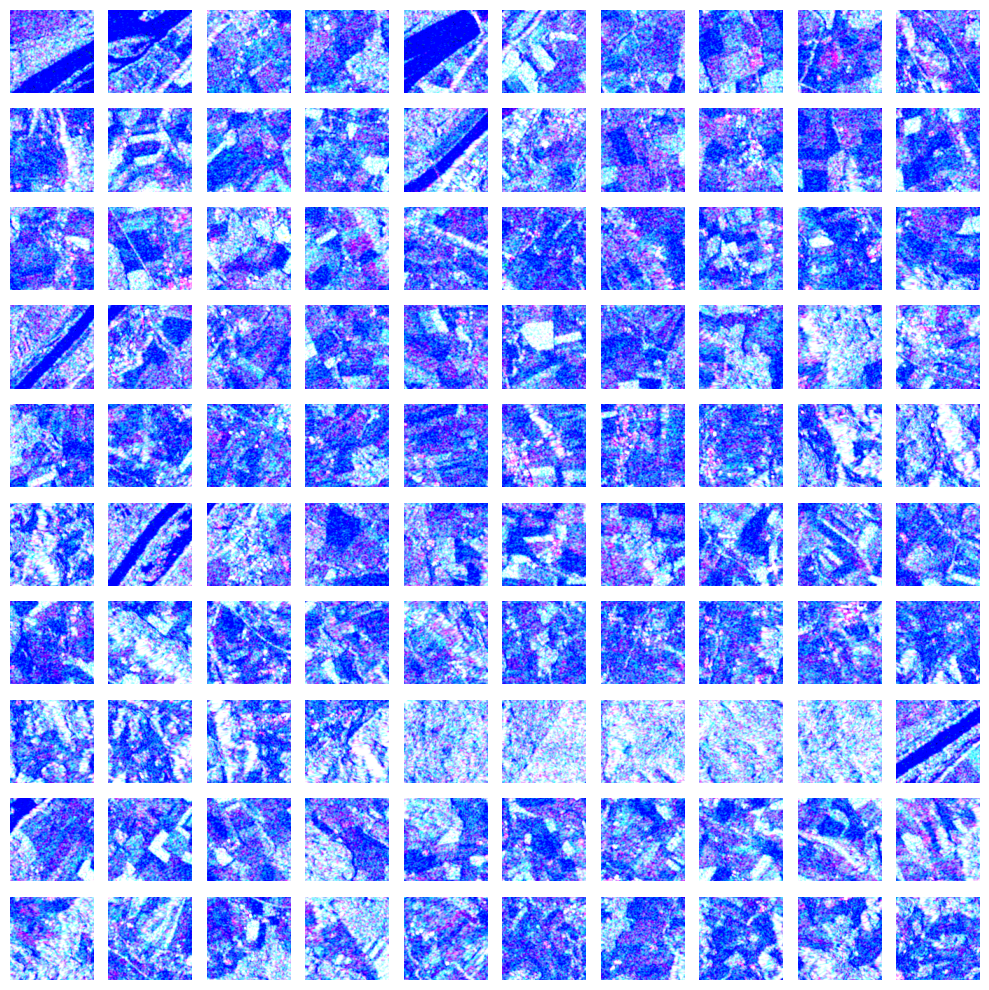

In [12]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
axs = axs.flatten()
for i, (key, patch) in enumerate(reader.iterate()):
    if i >= len(axs):
        break
    axs[i].imshow(s1_to_rgb(patch))
    axs[i].axis("off")
plt.tight_layout()
plt.show()

In [46]:
def normalize_percentile(images: np.ndarray) -> np.ndarray:
    min = np.percentile(images, 10, axis=(0, 1, 2), keepdims=True)
    max = np.percentile(images, 90, axis=(0, 1, 2), keepdims=True)
    print(f"{min.shape} {min=}, {max.shape} {max=}")
    return np.clip((images - min) / (max - min), 0, 1)

(1, 1, 1, 3) min=array([[[[-15.9711215 , -22.00102978,   1.94600897]]]]), (1, 1, 1, 3) max=array([[[[ -6.5824491 , -12.33265018,  10.16444235]]]])


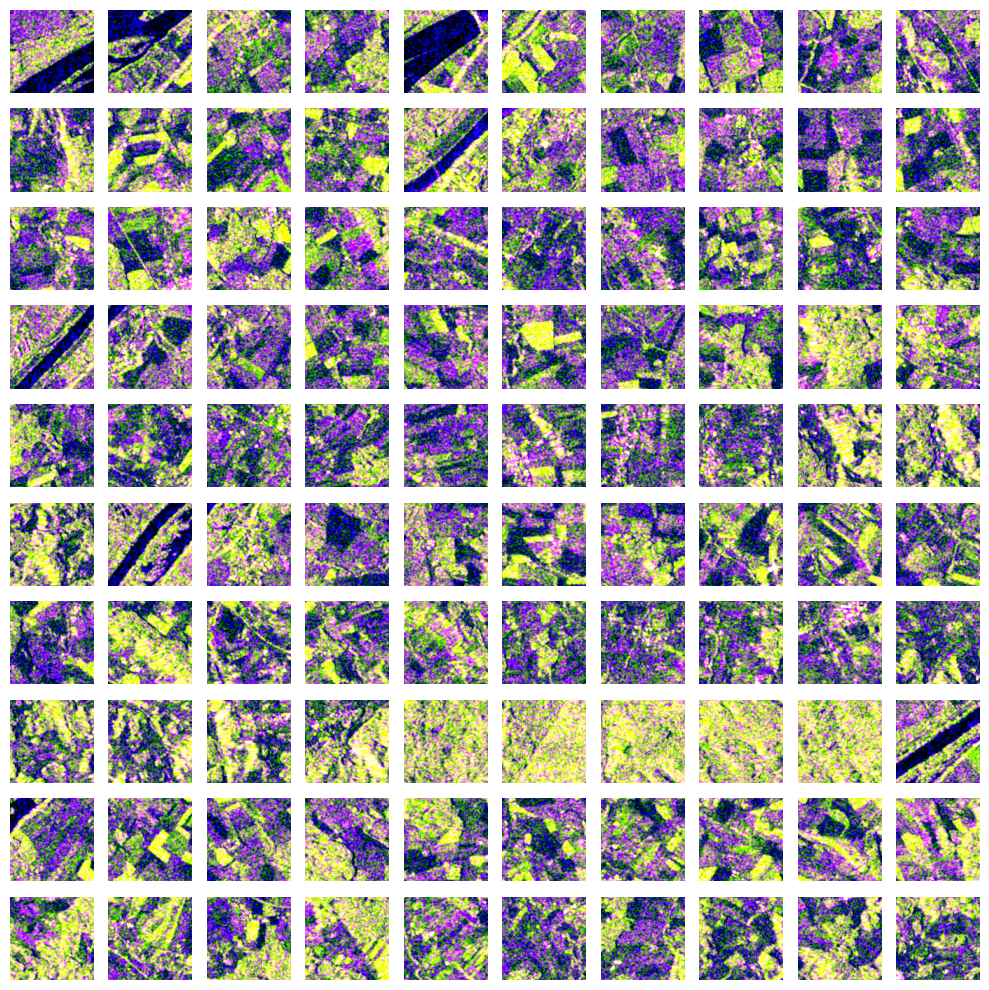

In [50]:
from itertools import islice

fig, axs = plt.subplots(10, 10, figsize=(10,10))
axs = axs.flatten()
n = len(axs)
images = np.array([s1_to_rgb(s1, norm=False) for _, s1 in islice(reader.iterate(), n)])
images = normalize_percentile(images) * np.array([[[[1.0, 1.0, 1.0]]]])
for ax, rgb in zip(axs, images):
    ax.imshow(rgb)
    ax.axis("off")
plt.tight_layout()
plt.show()